## Import the Necessary Libraries :

In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [15]:
# Load the datset
data= load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
data.data.shape

(569, 30)

In [18]:
# Split the dataset into training and test data
training_data, testing_data, training_labels, testing_labels= train_test_split(data.data, data.target, test_size= 0.20, random_state= 42)

In [19]:
# Fit on the training data and transform both training and testing data
scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)
testing_data = scaler.transform(testing_data)

## K-Nearest Neighbors (KNN) Model

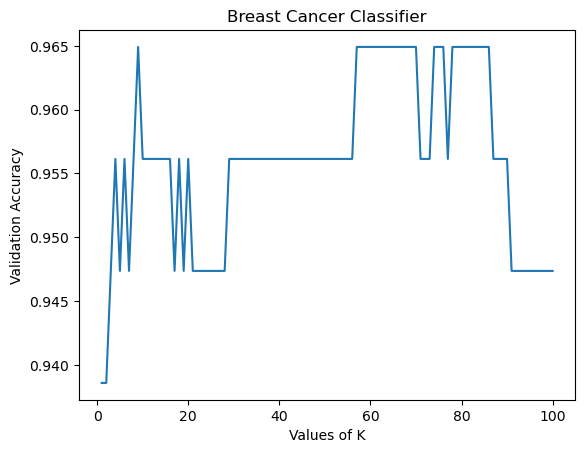

In [21]:
ks= [i for i in range(1,101)]
k_values= list()
for k in range(1,101):
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(training_data, training_labels)
  k_values.append(knn.score(testing_data, testing_labels))

# PLotting the graph
plt.plot(ks, k_values)
plt.xlabel("Values of K")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier")
plt.show()

In [22]:
# Initialize the K-Nearest Neighbors (KNN) Classifier with 9 neighbors
knn_model = KNeighborsClassifier(n_neighbors=9) 

# Train the KNN model on the training data and labels
knn_model.fit(training_data, training_labels)

# Predict the labels for the testing data
knn_pred = knn_model.predict(testing_data)

# Calculate the accuracy of the KNN model
knn_acc = accuracy_score(testing_labels, knn_pred)*100   # For Classification model, we use accuracy_score instead of R^2 and MSE

print("Accuracy of K Nearest Neighbour Model: {:.2f}%".format(knn_acc))

Accuracy of K Nearest Neighbour Model: 96.49%


## Decision Tree Model

Accuracy of Decision Tree Model: 94.74%

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



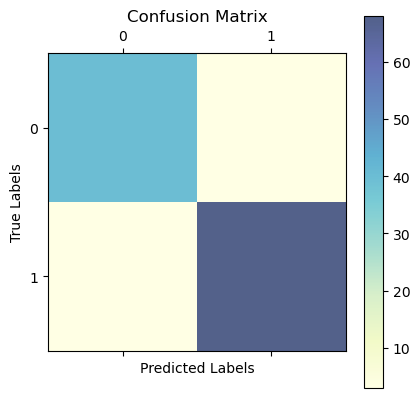

In [24]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(training_data, training_labels)

# Predict on the testing data
dt_pred = dt_model.predict(testing_data)

# Calculate accuracy
dt_acc = accuracy_score(testing_labels, dt_pred)*100   # It is a classification model , so using accuracy instead of R^2
print("Accuracy of Decision Tree Model: {:.2f}%".format(dt_acc))

# Display confusion matrix
conf_matrix = confusion_matrix(testing_labels, dt_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(testing_labels, dt_pred, target_names=data.target_names)
print("\nClassification Report:\n", class_report)

# Visualize Confusion Matrix
plt.matshow(conf_matrix, cmap="YlGnBu", alpha=0.7)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

## Linear Regression Model

In [26]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model on the training data and labels
linear_model.fit(training_data, training_labels)

# Evaluate the model's performance on the training data
score = linear_model.score(training_data, training_labels)
print("R² Score(Training): ", score)

# Predict the labels for the testing data
linear_pred = linear_model.predict(testing_data)

# Calculate the R² score & Mean Squared Error (MSE) for the testing dataset
linear_r2 = r2_score(testing_labels, linear_pred)
linear_acc = linear_r2*100
linear_mse = mean_squared_error(testing_labels, linear_pred)

# Print the performance metrics of the Linear Regression model
print("Mean Squared Error : ", linear_mse)
print("R² Score : ", linear_r2)
print("Accuracy of Linear Regression Model: {:.2f}%".format(linear_acc))

R² Score(Training):  0.7789778474553671
Mean Squared Error :  0.06410886247029464
R² Score :  0.7271016126223553
Accuracy of Linear Regression Model: 72.71%


## Logistic Regression Model

Accuracy of Logistic Regression Model: 97.37%

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



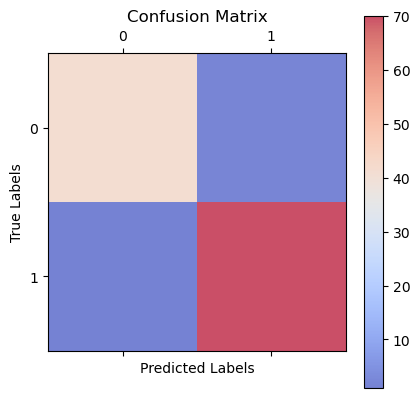

In [28]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=5000)  # Increased max_iter for convergence
logistic_model.fit(training_data, training_labels)

# Predicting on test data
logistic_pred = logistic_model.predict(testing_data)

# Evaluate the model
logistic_acc = accuracy_score(testing_labels, logistic_pred)*100
print("Accuracy of Logistic Regression Model: {:.2f}%".format(logistic_acc))

# Display confusion matrix
conf_matrix = confusion_matrix(testing_labels, logistic_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(testing_labels, logistic_pred, target_names=data.target_names)
print("\nClassification Report:\n", class_report)

# Visualize Confusion Matrix
plt.matshow(conf_matrix, cmap="coolwarm", alpha=0.7)
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

## Random Forest Model

In [30]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(training_data, training_labels)

# Make predictions
rf_pred = rf_model.predict(testing_data)

# Evaluate the model
rf_acc = accuracy_score(testing_labels, rf_pred)*100
print("Accuracy of Logistic Regression Model: {:.2f}%".format(rf_acc))

Accuracy of Logistic Regression Model: 96.49%


## Adaboost Classifier

In [32]:
# Initialize and train the Adaboost Classifier model
adb_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adb_model.fit(training_data, training_labels)

# Make predictions
adb_pred = adb_model.predict(testing_data)

# Calculate accuracy
adb_acc = accuracy_score(testing_labels, adb_pred)*100
print("Accuracy of Adaboost Model: {:.2f}%".format(adb_acc))

C:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of Adaboost Model: 96.49%


## Gradient Boosting Classifier

In [34]:
# Initialize and train the Gradient Boosting Classisfier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(training_data, training_labels)

# Make predictions
gb_pred = gb_model.predict(testing_data)

# Calculate accuracy
gb_acc = accuracy_score(testing_labels, gb_pred)*100
print("Accuracy of Gradient Boosting Model: {:.2f}%".format(gb_acc))

Accuracy of Gradient Boosting Model: 96.49%


## XGBoost Classifier

In [42]:
# Initialize and train the XGBoost Classifier model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(training_data, training_labels)

# Make predictions
xgb_pred = xgb_model.predict(testing_data)

# Calculate accuracy
xgb_acc = accuracy_score(testing_labels, xgb_pred)*100
print("Accuracy of Gradient Boosting Model: {:.2f}%".format(xgb_acc))

Accuracy of Gradient Boosting Model: 95.61%


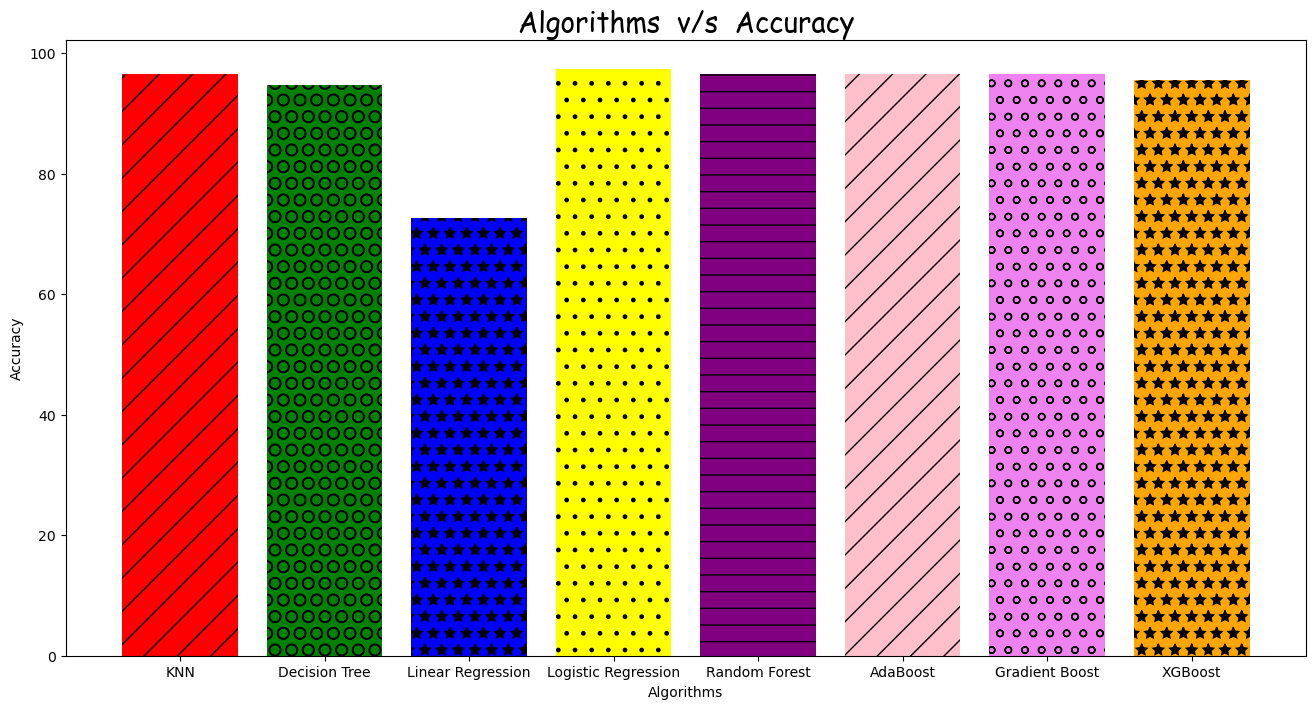

In [43]:
algorithms = ['KNN', 'Decision Tree', 'Linear Regression', 'Logistic Regression','Random Forest', 'AdaBoost', 'Gradient Boost', 'XGBoost']
accuracy = [knn_acc, dt_acc, linear_acc, logistic_acc, rf_acc, adb_acc, gb_acc, xgb_acc]

plt.figure(figsize=(16,8))
bars = plt.bar(algorithms, accuracy, color=["red", "green", "blue", "yellow", "purple", "pink", "violet", "orange"])
patterns = ['/', 'O', '*', '.', '-', '/', 'o', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))
    
plt.title('Algorithms  v/s  Accuracy', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()